# Actividad 2 - Python. Web Scraping
## Utilizar al menos las librerías BeatifulSoup y/o Selenium mediante el lenguaje Python para navegar por una página web, extraer la información elegida y depositarla en un medio de almacenamiento como puede ser un fichero .txt, Excel o base de datos

#### IMPORTANTE: Para evitar errores después de la ejecución de cada parte del código abra Chroome para ir visualizando que todo va cargándose correctamente. De lo contrario podría dar error debido a que el programa estaría ejecutando un código en el que se busque un elemento el cual todavia no haya sido cargado.

In [1]:
import pandas as pd
import sys 
import time 
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

#### Navegaré por la página 'google flights' para obtener información de vuelos. En este caso buscaré información de los precios de los vuelos según el día de ida y el de vuelta para viajar a Viena en el mes de Junio. 

In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

url = "https://www.google.com/flights/?hl=es_419"          
driver.get(url)

C:\Users\rlope\AppData\Local\Temp\ipykernel_12912\1749283338.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


#### Aceptamos las cookies.

In [3]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
cookies = driver.find_element(By.XPATH,'//*[@id="yDmH0d"]/c-wiz/div/div/div/div[2]/div[1]/div[3]/div[1]/div[1]/form[2]/div/div/button')
cookies.click()

#### A continuación mediante el XPATH del elemento, busco las cajas donde introducir las ciudades de salida y de llegada.

In [4]:
salida = driver.find_element(By.XPATH,'//*[@id="i15"]/div[1]/div/div/div[1]/div/div/input')
salida.click()

Escribo la ciudad de salida que deseo en esa caja. En este caso Madrid.

In [5]:
salida2 = driver.find_element(By.XPATH,'//*[@id="i15"]/div[6]/div[2]/div[2]/div[1]/div/input')
salida2.send_keys("Aeropuerto Adolfo Suárez Madrid-Barajas") 
salida2.send_keys(Keys.ENTER)

In [6]:
destino = driver.find_element(By.XPATH,'//*[@id="i15"]/div[4]/div/div/div[1]/div/div/input')
destino.click()

Escribo el destino que deseo en esa caja. En este caso Viena.

In [7]:
destino2 = driver.find_element(By.XPATH,'//*[@id="i15"]/div[6]/div[2]/div[2]/div[1]/div/input')
destino2.send_keys("Viena, Austria") 
destino2.send_keys(Keys.ENTER)

#### Ahora abro el menú desplegable con las fechas y elijo en las que quiero realizar el viaje.
Mediante el elemento 'fecha' abro dicho calendario, pulsando en el elemento 'boton' voy hasta el mes de junio y elijo los días de ida y de vuelta mediante los elementos 'fecha_ida' y 'fecha_vuelta'.

In [8]:
fecha = driver.find_element(By.XPATH,"/html/body/c-wiz[2]/div/div[2]/c-wiz/div[1]/c-wiz/div[2]/div[1]/div[1]/div[1]/div/div[2]/div[2]/div/div/div[1]/div/div/div[1]/div/div[1]/div/input")
fecha.click()

In [9]:
boton = driver.find_element(By.XPATH,"/html/body/c-wiz[2]/div/div[2]/c-wiz/div[1]/c-wiz/div[2]/div[1]/div[1]/div[1]/div/div[2]/div[2]/div/div/div[2]/div/div[2]/div[2]/div/div/div[3]/div/div/button/div[3]")
boton.click()

In [10]:
boton.click()

In [11]:
fecha_ida = driver.find_element(By.XPATH,"/html/body/c-wiz[2]/div/div[2]/c-wiz/div[1]/c-wiz/div[2]/div[1]/div[1]/div[1]/div/div[2]/div[2]/div/div/div[2]/div/div[2]/div[2]/div/div/div[1]/div/div[4]/div[3]/div[3]/div[5]/div")
fecha_ida.click()

In [12]:
fecha_vuelta = driver.find_element(By.XPATH,"/html/body/c-wiz[2]/div/div[2]/c-wiz/div[1]/c-wiz/div[2]/div[1]/div[1]/div[1]/div/div[2]/div[2]/div/div/div[2]/div/div[2]/div[2]/div/div/div[1]/div/div[4]/div[3]/div[4]/div[1]/div")
fecha_vuelta.click()

In [13]:
listo = driver.find_element(By.XPATH,"/html/body/c-wiz[2]/div/div[2]/c-wiz/div[1]/c-wiz/div[2]/div[1]/div[1]/div[1]/div/div[2]/div[2]/div/div/div[2]/div/div[3]/div[3]/div/button")
listo.click()

In [14]:
buscar = driver.find_element(By.XPATH,"/html/body/c-wiz[2]/div/div[2]/c-wiz/div[1]/c-wiz/div[2]/div[1]/div[1]/div[2]/div/button")
buscar.click()

#### Abro una tabla de precios el cual me dará la información que busco.

In [15]:
fechas = driver.find_element(By.XPATH,'//*[@id="yDmH0d"]/c-wiz[2]/div/div[2]/c-wiz/div[1]/c-wiz/div[2]/div[2]/div[2]/div[2]/div/div/div[1]/button')
fechas.click()  

Guardo los días de ida.

In [16]:
ida=[]
for i in range(2,9):
    element1 = driver.find_element(By.XPATH, '//*[@id="yDmH0d"]/div[7]/div[1]/div[3]/div[1]/div/div[2]/span/div/div[1]/div/div[2]/div/div/div[1]/div[2]/div[1]/div/div[1]/div'+str([i])).text
    ida.append(element1)
print(ida)

['mar\n13 jun', 'mié\n14 jun', 'jue\n15 jun', 'vie\n16 jun', 'sáb\n17 jun', 'dom\n18 jun', 'lun\n19 jun']


Guardo los días de vuelta.

In [17]:
vuelta=[]
for i in range(2,9):
    element2 = driver.find_element(By.XPATH, '//*[@id="yDmH0d"]/div[7]/div[1]/div[3]/div[1]/div/div[2]/span/div/div[1]/div/div[2]/div/div/div[1]/div[2]/div[1]/div/div[3]/div'+str([i])).text
    vuelta.append(element2)
print(vuelta)

['vie\n16 jun', 'sáb\n17 jun', 'dom\n18 jun', 'lun\n19 jun', 'mar\n20 jun', 'mié\n21 jun', 'jue\n22 jun']


#### Ahora para cada día de la semana en la que tengo considerado el vuelo de vuelta, guardaré los precios según el día de ida.

En este primer caso, tenemos todos los precios suponiendo la vuelta el viernes 16 de junio. Como este es el día de vuelta es normal ver que para los días sábado, domingo y lunes no hay precios pues todos estos son días posteriores al considerado como vuelta.

In [18]:
vuelta_viernes=[]
for i in range(11,18):
    element3 = driver.find_element(By.XPATH, '//*[@id="yDmH0d"]/div[7]/div[1]/div[3]/div[1]/div/div[2]/span/div/div[1]/div/div[2]/div/div/div[1]/div[2]/div[1]/div/div[2]/div'+str([i])).text
    vuelta_viernes.append(element3)
print(vuelta_viernes)

['EUR 165', 'EUR 143', 'EUR 141', 'EUR 248', '', '', '']


In [19]:
vuelta_sabado=[]
for i in range(20,27):
    element4 = driver.find_element(By.XPATH, '//*[@id="yDmH0d"]/div[7]/div[1]/div[3]/div[1]/div/div[2]/span/div/div[1]/div/div[2]/div/div/div[1]/div[2]/div[1]/div/div[2]/div'+str([i])).text
    vuelta_sabado.append(element4)
print(vuelta_sabado)

['EUR 124', 'EUR 102', 'EUR 100', 'EUR 127', 'EUR 187', '', '']


In [20]:
vuelta_domingo=[]
for i in range(29,36):
    element5 = driver.find_element(By.XPATH, '//*[@id="yDmH0d"]/div[7]/div[1]/div[3]/div[1]/div/div[2]/span/div/div[1]/div/div[2]/div/div/div[1]/div[2]/div[1]/div/div[2]/div'+str([i])).text
    vuelta_domingo.append(element5)
print(vuelta_domingo)

['EUR 123', 'EUR 101', 'EUR 98', 'EUR 125', 'EUR 113', 'EUR 228', '']


In [21]:
vuelta_lunes=[]
for i in range(38,45):
    element6 = driver.find_element(By.XPATH, '//*[@id="yDmH0d"]/div[7]/div[1]/div[3]/div[1]/div/div[2]/span/div/div[1]/div/div[2]/div/div/div[1]/div[2]/div[1]/div/div[2]/div'+str([i])).text
    vuelta_lunes.append(element6)
print(vuelta_lunes)

['EUR 114', 'EUR 92', 'EUR 90', 'EUR 117', 'EUR 105', 'EUR 115', 'EUR 242']


In [22]:
vuelta_martes=[]
for i in range(47,54):
    element7 = driver.find_element(By.XPATH, '//*[@id="yDmH0d"]/div[7]/div[1]/div[3]/div[1]/div/div[2]/span/div/div[1]/div/div[2]/div/div/div[1]/div[2]/div[1]/div/div[2]/div'+str([i])).text
    vuelta_martes.append(element7)
print(vuelta_martes)

['EUR 120', 'EUR 98', 'EUR 96', 'EUR 123', 'EUR 111', 'EUR 121', 'EUR 114']


In [23]:
vuelta_miercoles=[]
for i in range(56,63):
    element8 = driver.find_element(By.XPATH, '//*[@id="yDmH0d"]/div[7]/div[1]/div[3]/div[1]/div/div[2]/span/div/div[1]/div/div[2]/div/div/div[1]/div[2]/div[1]/div/div[2]/div'+str([i])).text
    vuelta_miercoles.append(element8)
print(vuelta_miercoles)

['EUR 130', 'EUR 108', 'EUR 105', 'EUR 133', 'EUR 120', 'EUR 131', 'EUR 124']


In [24]:
vuelta_jueves=[]
for i in range(65,72):
    element9 = driver.find_element(By.XPATH, '//*[@id="yDmH0d"]/div[7]/div[1]/div[3]/div[1]/div/div[2]/span/div/div[1]/div/div[2]/div/div/div[1]/div[2]/div[1]/div/div[2]/div'+str([i])).text
    vuelta_jueves.append(element9)
print(vuelta_jueves)

['EUR 131', 'EUR 109', 'EUR 107', 'EUR 134', 'EUR 122', 'EUR 132', 'EUR 125']


#### Realizo un producto cartesiano de las tuplas ida y vuelta, para tener una nueva tupla, con el dia que inicia el viaje y el día que finaliza. Así a cada elemento de esta nueva tupla podra asignarle los precios correspondientes.

In [25]:
from itertools import product
viaje = list(product(vuelta,ida))

#### Una vez los tengo ordenados como quiero (para cada día de vuelta los posibles días de ida) creo dos tuplas que sigan ese orden pero que distingan la fecha de ida y la de vuelta, es decir, que divida en dos partes cada elemento de la tupla viaje.

In [26]:
fecha_ida=[]
fecha_vuelta=[]
for i in viaje:
    fecha_ida.append(i[1])
    fecha_vuelta.append(i[0])

#### Creo el dataframe.

In [27]:
precio_vuelta=vuelta_viernes+vuelta_sabado+vuelta_domingo+vuelta_lunes+vuelta_martes+vuelta_miercoles+vuelta_jueves
df= pd.DataFrame(zip(fecha_ida,fecha_vuelta,precio_vuelta),columns=['Fecha_Ida','Fecha_Vuelta','Precio'])
df

,Fecha_Ida,Fecha_Vuelta,Precio
0,mar\n13 jun,vie\n16 jun,EUR 165
1,mié\n14 jun,vie\n16 jun,EUR 143
2,jue\n15 jun,vie\n16 jun,EUR 141
3,vie\n16 jun,vie\n16 jun,EUR 248
4,sáb\n17 jun,vie\n16 jun,
5,dom\n18 jun,vie\n16 jun,
6,lun\n19 jun,vie\n16 jun,
7,mar\n13 jun,sáb\n17 jun,EUR 124
8,mié\n14 jun,sáb\n17 jun,EUR 102
9,jue\n15 jun,sáb\n17 jun,EUR 100


#### Hay días que no presentan precio debido a que la fecha de ida es más tarde que la de vuelta,  por lo que no hay posibilidad de vuelos. Por lo tanto creo un nuevo data frame sin esos vuelos.

#### Además, como la fecha presenta un \n debido a un salto de línea hago un replace para mostrarlo de forma más visual.

In [28]:
df_new=df[df['Precio']!='']

columnas = ['Fecha_Ida','Fecha_Vuelta', 'Precio']
for col in columnas:
    df_new[col] = df_new[col].str.replace('\n',' - ')
    df_new[col] = df_new[col].str.replace('EUR', '')
#Pongo el precio con el simbolo € en vez de con EUR
for i in df_new['Precio']:
    df_new['Precio'] = df_new['Precio'].replace(i, i + ' €')
df_new

C:\Users\rlope\AppData\Local\Temp\ipykernel_12912\2998987953.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col] = df_new[col].str.replace('\n',' - ')
C:\Users\rlope\AppData\Local\Temp\ipykernel_12912\2998987953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[col] = df_new[col].str.replace('EUR', '')
C:\Users\rlope\AppData\Local\Temp\ipykernel_12912\2998987953.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,Fecha_Ida,Fecha_Vuelta,Precio
0,mar - 13 jun,vie - 16 jun,165 €
1,mié - 14 jun,vie - 16 jun,143 €
2,jue - 15 jun,vie - 16 jun,141 €
3,vie - 16 jun,vie - 16 jun,248 €
7,mar - 13 jun,sáb - 17 jun,124 €
8,mié - 14 jun,sáb - 17 jun,102 €
9,jue - 15 jun,sáb - 17 jun,100 €
10,vie - 16 jun,sáb - 17 jun,127 €
11,sáb - 17 jun,sáb - 17 jun,187 €
14,mar - 13 jun,dom - 18 jun,123 €


#### Me conecto a mysql para guardar los datos en una base de datos relacional.

In [29]:
import mysql.connector

#### Creo una base de datos llamado 'VUELOS' y dentro de esa base de datos una tabla llamada 'Vuelos'.

In [30]:
con = mysql.connector.connect(user = "root", password = "root", host = "127.0.0.1")
cursor = con.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS VUELOS")
cursor.execute("USE VUELOS")
cursor.execute("CREATE TABLE IF NOT EXISTS Vuelos (FECHA_IDA VARCHAR(15),FECHA_VUELTA VARCHAR(20),PRECIOS VARCHAR(10))")

#### Introduzco los datos en la base de datos.

In [31]:
for i in df_new.index:
    Fecha_ida = df_new.Fecha_Ida[i]
    Fecha_vuelta = df_new.Fecha_Vuelta[i]
    precio = df_new.Precio[i]
    add_producto = ("INSERT INTO Vuelos "
               "(FECHA_IDA, FECHA_VUELTA, PRECIOS) "
               "VALUES (%s, %s, %s)")
    data_producto = (Fecha_ida, Fecha_vuelta, precio)
    cursor.execute(add_producto, data_producto)
    
    con.commit()

#### Muestro dichos datos y compruebo que se han guardado correctamente.

In [32]:
cursor.execute("SELECT * FROM Vuelos;")

rows = cursor.fetchall()

for row in rows:
    print(row)

('mar - 13 jun', 'vie - 16 jun', ' 146 €')
('mié - 14 jun', 'vie - 16 jun', ' 139 €')
('jue - 15 jun', 'vie - 16 jun', ' 137 €')
('vie - 16 jun', 'vie - 16 jun', ' 187 €')
('mar - 13 jun', 'sáb - 17 jun', ' 99 €')
('mié - 14 jun', 'sáb - 17 jun', ' 93 €')
('jue - 15 jun', 'sáb - 17 jun', ' 91 €')
('vie - 16 jun', 'sáb - 17 jun', ' 137 €')
('sáb - 17 jun', 'sáb - 17 jun', ' 218 €')
('mar - 13 jun', 'dom - 18 jun', ' 100 €')
('mié - 14 jun', 'dom - 18 jun', ' 94 €')
('jue - 15 jun', 'dom - 18 jun', ' 92 €')
('vie - 16 jun', 'dom - 18 jun', ' 138 €')
('sáb - 17 jun', 'dom - 18 jun', ' 108 €')
('dom - 18 jun', 'dom - 18 jun', ' 193 €')
('mar - 13 jun', 'lun - 19 jun', ' 118 €')
('mié - 14 jun', 'lun - 19 jun', ' 112 €')
('jue - 15 jun', 'lun - 19 jun', ' 110 €')
('vie - 16 jun', 'lun - 19 jun', ' 155 €')
('sáb - 17 jun', 'lun - 19 jun', ' 126 €')
('dom - 18 jun', 'lun - 19 jun', ' 143 €')
('lun - 19 jun', 'lun - 19 jun', ' 148 €')
('mar - 13 jun', 'mar - 20 jun', ' 105 €')
('mié - 14 jun',

In [33]:
con.close()

#### Creamos un nuevo dataframe que muestre más calaramente el precio por día de ida y vuelta.

#### Para realizar un mapa de calor cambio el string del precio por un entero.

In [34]:
df_new2=df
for col in columnas:
    df_new2[col] = df_new2[col].str.replace('\n',' - ')
    df_new2[col] = df_new2[col].str.replace('EUR', '')
df_new2

,Fecha_Ida,Fecha_Vuelta,Precio
0,mar - 13 jun,vie - 16 jun,165
1,mié - 14 jun,vie - 16 jun,143
2,jue - 15 jun,vie - 16 jun,141
3,vie - 16 jun,vie - 16 jun,248
4,sáb - 17 jun,vie - 16 jun,
5,dom - 18 jun,vie - 16 jun,
6,lun - 19 jun,vie - 16 jun,
7,mar - 13 jun,sáb - 17 jun,124
8,mié - 14 jun,sáb - 17 jun,102
9,jue - 15 jun,sáb - 17 jun,100


In [35]:
df_new2["Precio"]=pd.to_numeric(df_new2["Precio"],errors='coerce')
# Transformo en entero los string de la columna 'Precio' y aquellas filas sin ningún valor las declaro como NAN
df_new3=df_new2["Fecha_Vuelta"].drop_duplicates()
orden_columnas=list(df_new3)
data = df_new2.pivot_table("Precio","Fecha_Ida","Fecha_Vuelta", sort=False)
# Uso la función pivot_table porque me permite crear la tabla sin que me ordene las filas por orden alfabético.
data = data[orden_columnas]
# Para evitar este orden alfabético pero ahora en las columnas asigno al data frame el orden dado por 'orden_columnas'.
data

Fecha_Vuelta,vie - 16 jun,sáb - 17 jun,dom - 18 jun,lun - 19 jun,mar - 20 jun,mié - 21 jun,jue - 22 jun
Fecha_Ida,,,,,,,
mar - 13 jun,165.0,124.0,123.0,114.0,120.0,130.0,131.0
mié - 14 jun,143.0,102.0,101.0,92.0,98.0,108.0,109.0
jue - 15 jun,141.0,100.0,98.0,90.0,96.0,105.0,107.0
vie - 16 jun,248.0,127.0,125.0,117.0,123.0,133.0,134.0
sáb - 17 jun,NaN,187.0,113.0,105.0,111.0,120.0,122.0
dom - 18 jun,NaN,NaN,228.0,115.0,121.0,131.0,132.0
lun - 19 jun,NaN,NaN,NaN,242.0,114.0,124.0,125.0


#### Creo el mapa de calor

<AxesSubplot:xlabel='Fecha_Vuelta', ylabel='Fecha_Ida'>

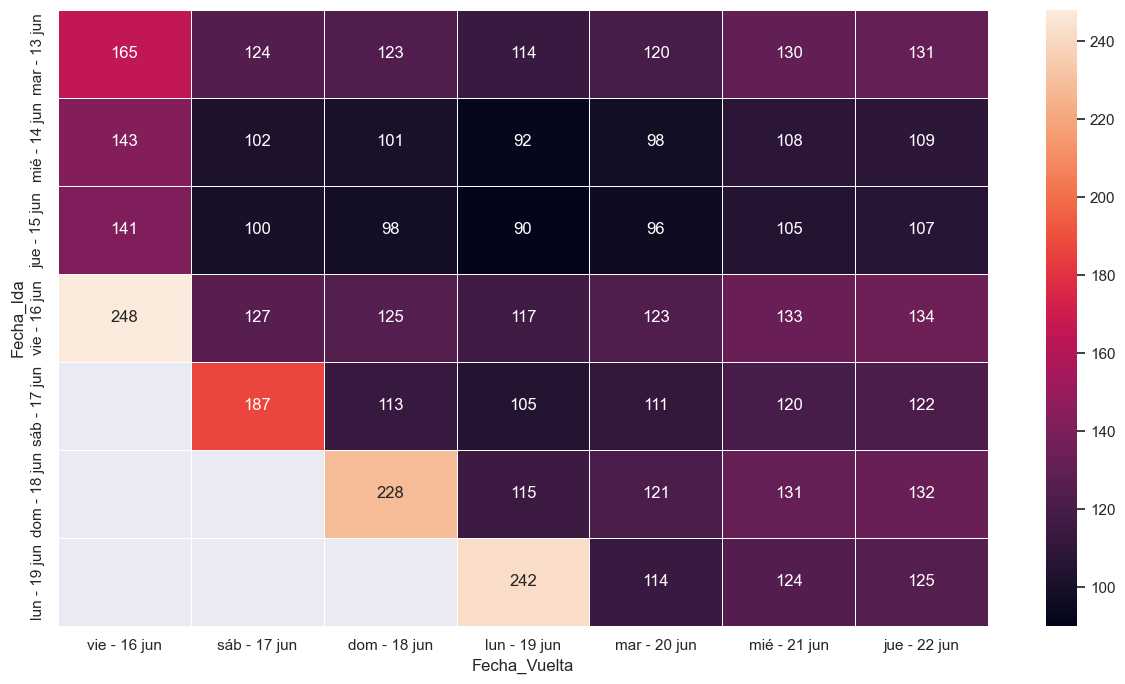

In [36]:
import seaborn as sns
sns.set(rc={'figure.figsize': (15,8)})
sns.heatmap(data = data, annot=True, linewidths=.5, fmt='.3g')


#### Vemos como los precios con un color más oscuro son los más baratos y por lo tanto esos serán los más convenientes para realizar el viaje.